In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, Stream

client = Client("IRIS")

In [2]:
inventory = client.get_stations(network="HV", station="HMLE", channel="HNZ")

In [3]:
[n for n in inventory.networks]

[Network HV (Hawaiian Volcano Observatory Network (HVO))
	Station Count: 1/113 (Selected/Total)
	1956-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (1):
			HV.HMLE (Mauna Loa Estates, HI)
		Channels (0):
]

In [4]:
inventory.networks[0].stations

[Station HMLE (Mauna Loa Estates, HI)
	Station Code: HMLE
	Channel Count: 0/6 (Selected/Total)
	2012-05-03T00:00:00.000000Z - 
	Access: open 
	Latitude: 19.4256, Longitude: -155.2201, Elevation: 1108.0 m
	Available Channels:
]

In [5]:
starttime = UTCDateTime(2022, 11, 28, 6)
endtime = UTCDateTime(2022, 11, 28, 10)
inv = client.get_stations(network="HV", latitude=19.4256, longitude=-155.2201, maxradius=.5, 
                          startbefore=starttime, endafter=endtime, level="station", channel="HN?")
print(inv)

Inventory created at 2023-04-17T23:48:51.440900Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=HV&channel=H...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			HV
		Stations (25):
			HV.AIND (Ainapo Ranch, Hawaii Digital)
			HV.DDHD (Old Kalapana Rd, Pahoa, HI)
			HV.DESD (Desert)
			HV.FKSS (Crystal Circle, Nanawale, Pahoa, HI)
			HV.HBOP (Kula St, Pahoa, HI)
			HV.HFA (Plumeria St, Fern Acres, HI)
			HV.HGC (Honomu, HI)
			HV.HLPD (Hilina Pali Digital)
			HV.HMLE (Mauna Loa Estates, HI)
			HV.HPP (21st Ave, Keaau, HI)
			HV.HQM (Papaikou, HI)
			HV.HSSD (Humuluula Sheep Station Digital)
			HV.HVGC (Volcano Golf Course, Volcano, HI)
			HV.JOKA (Jonika Flow)
			HV.KIND (Kindschuh)
			HV.KLPN (Old Kalapana Road)
			HV.MLOD (Mauna Loa Digital)
			HV.MOKD (Mokuaweoweo Crater Digital)
			HV.MOTT (Kauai Ln, Nanawale Estates, HI)
			HV.NAGD (National Air Guard Digital)
			HV.PAUD (Pauahi, Ha

In [6]:
inv.networks[0].stations[-8].channels

[]

In [7]:
# Waveform from station HMLE, Mauna Loa Estates, Lat. 19.425621, Lon. -155.220093
st = client.get_waveforms(
    network="HV", station="HMLE", channel="HNZ",location="01",
    starttime=UTCDateTime(2022, 11, 28, 9, 0),
    endtime=UTCDateTime(2022, 11, 28, 9, 35))
print(st)

1 Trace(s) in Stream:
HV.HMLE.01.HNZ | 2022-11-28T09:00:00.000000Z - 2022-11-28T09:35:00.000000Z | 200.0 Hz, 420001 samples


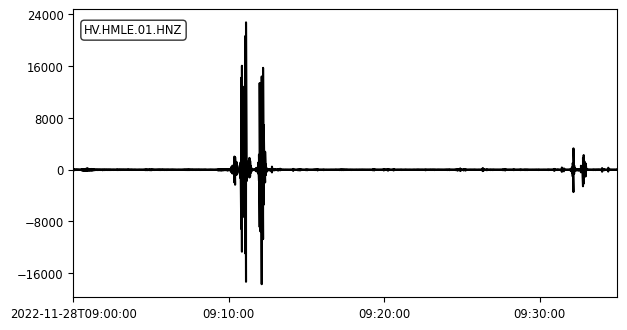

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig = st.plot(fig=fig, show=False)

plt.show()

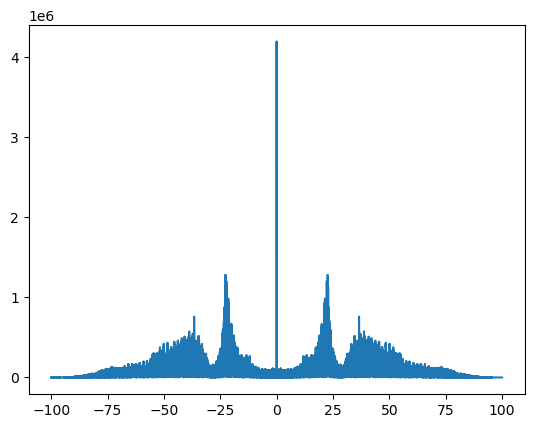

In [9]:
freqs = np.fft.fftshift(np.fft.fftfreq(420001, 1/200))
plt.plot(freqs, np.abs(np.fft.fftshift(np.fft.fft(st[0][:]))))

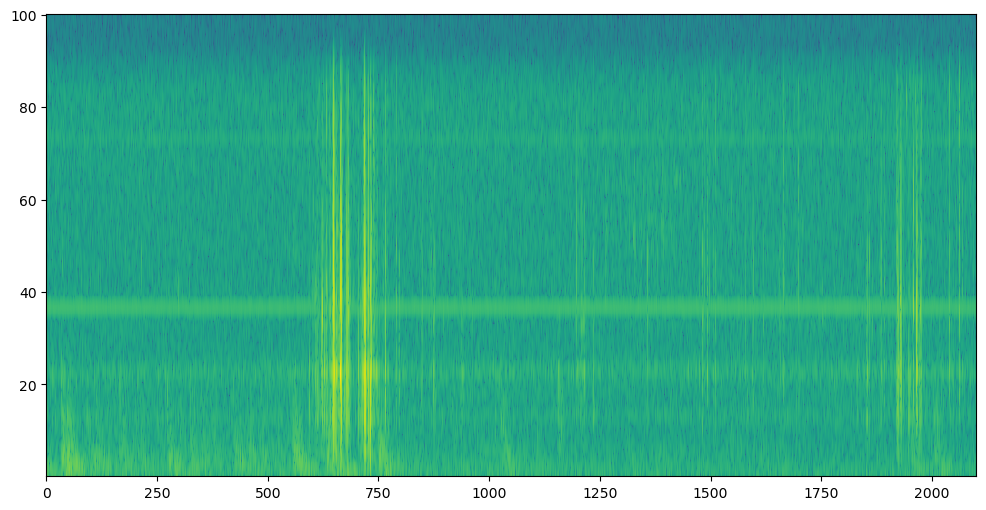

In [10]:
fig, ax = plt.subplots()
_ = st.spectrogram(log=False, dbscale=True, axes=ax, show=False)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.show()